In [65]:
import numpy as np
import pandas as pd
import sys
#for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
import plotly.express as px
from plotly import graph_objects as go

#plot wordcloud
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier

np.set_printoptions(threshold=sys.maxsize)


In [74]:
train_df = pd.read_csv("Datasets/train_complete.csv")
print(np.array(train_df.columns))
print(train_df.dtypes)
train_df = train_df.drop('Unnamed: 0', axis=1)

['Unnamed: 0' 'INDEX' 'ACTIVE' 'SMILES' 'num_atoms' 'mol_wt' 'mf_0' 'mf_1'
 'mf_2' 'mf_3' 'mf_4' 'mf_5' 'mf_6' 'mf_7' 'mf_8' 'mf_9' 'mf_10' 'mf_11'
 'mf_12' 'mf_13' 'mf_14' 'mf_15' 'mf_16' 'mf_17' 'mf_18' 'mf_19' 'mf_20'
 'mf_21' 'mf_22' 'mf_23' 'mf_24' 'mf_25' 'mf_26' 'mf_27' 'mf_28' 'mf_29'
 'mf_30' 'mf_31' 'mf_32' 'mf_33' 'mf_34' 'mf_35' 'mf_36' 'mf_37' 'mf_38'
 'mf_39' 'mf_40' 'mf_41' 'mf_42' 'mf_43' 'mf_44' 'mf_45' 'mf_46' 'mf_47'
 'mf_48' 'mf_49' 'mf_50' 'mf_51' 'mf_52' 'mf_53' 'mf_54' 'mf_55' 'mf_56'
 'mf_57' 'mf_58' 'mf_59' 'mf_60' 'mf_61' 'mf_62' 'mf_63' 'mf_64' 'mf_65'
 'mf_66' 'mf_67' 'mf_68' 'mf_69' 'mf_70' 'mf_71' 'mf_72' 'mf_73' 'mf_74'
 'mf_75' 'mf_76' 'mf_77' 'mf_78' 'mf_79' 'mf_80' 'mf_81' 'mf_82' 'mf_83'
 'mf_84' 'mf_85' 'mf_86' 'mf_87' 'mf_88' 'mf_89' 'mf_90' 'mf_91' 'mf_92'
 'mf_93' 'mf_94' 'mf_95' 'mf_96' 'mf_97' 'mf_98' 'mf_99' 'mf_100' 'mf_101'
 'mf_102' 'mf_103' 'mf_104' 'mf_105' 'mf_106' 'mf_107' 'mf_108' 'mf_109'
 'mf_110' 'mf_111' 'mf_112' 'mf_113' 'mf_114' '

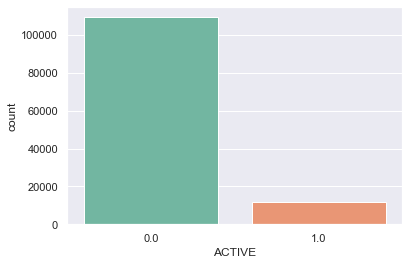

In [20]:
#df_activity = train_df['ACTIVE']
sns.set(style="darkgrid")
ax = sns.countplot(x="ACTIVE", data=train_df, palette="Set2")

Interested in the number of atoms for each compound

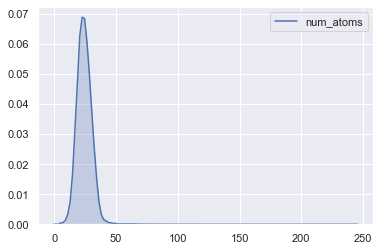

244


In [25]:
sns.set(style="darkgrid")
sns.kdeplot(data=train_df['num_atoms'], shade=True)
plt.show()

Molecular weight distribution

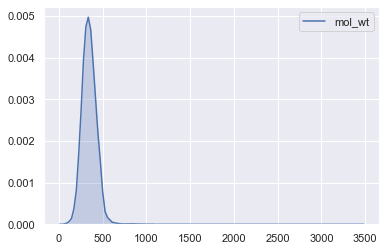

In [34]:
sns.set(style="darkgrid")
sns.kdeplot(data=train_df['mol_wt'], shade=True)
plt.show()

Lenght of the smile sequence

Unique values in smile_length:  208


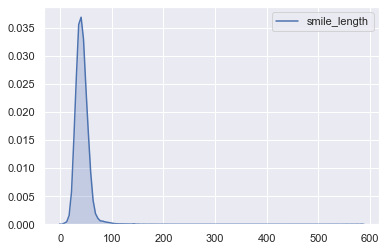

In [39]:
print("Unique values in smile_length: ", train_df['smile_length'].nunique())

sns.set(style="darkgrid")
sns.kdeplot(data=train_df['smile_length'], shade=True)
plt.show()

Plot distribution for each sequence

0    115949
1      5132
2       267
4        13
3         9
6         2
8         1
5         1
Name: B, dtype: int64


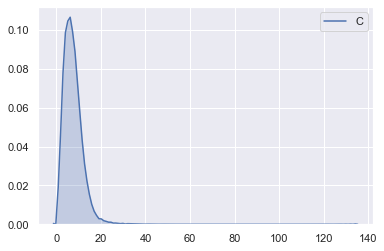

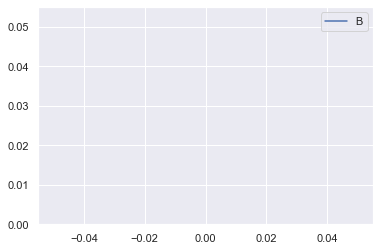

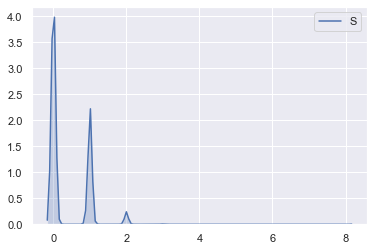

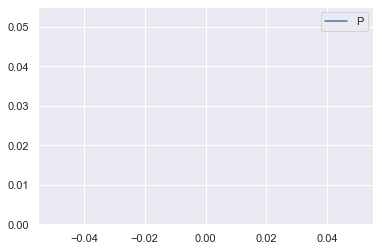

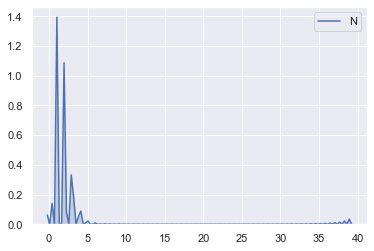

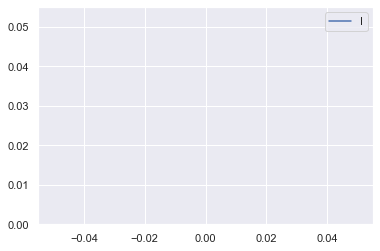

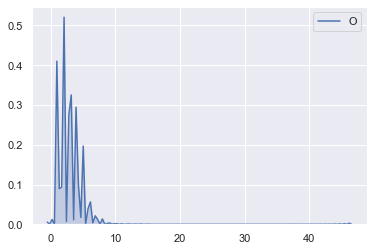

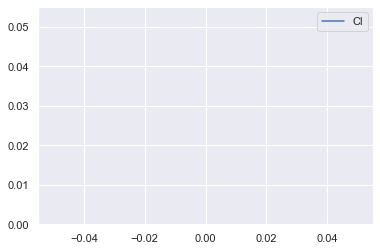

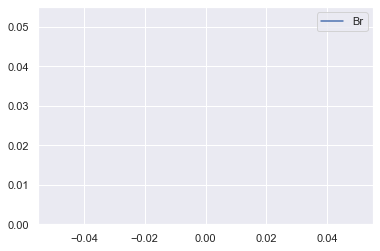

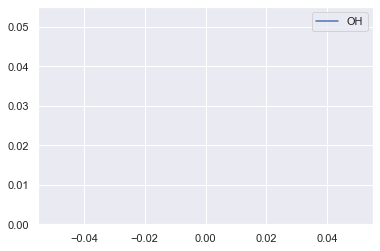

In [77]:
sequences = ['C', 'B', 'S', 'P', 'N', 'I', 'O', 'Cl', 'Br','OH']
ax_a = ()
'''
fig, ax_a = plt.subplots(2,5)
print(len(ax_a))
'''

'''
sns.set(style="darkgrid")
sns.kdeplot(data=train_df['B'], shade=True)
plt.show()
'''

print(train_df['B'].value_counts())


for s in sequences:
    sns.set(style="darkgrid")
    sns.kdeplot(data=train_df[s], shade=True)
    plt.show()
#plt.show()



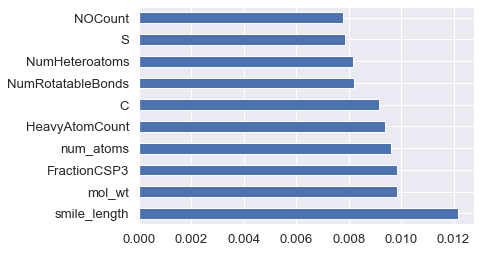

In [75]:
model = ExtraTreesClassifier()

Y = train_df['ACTIVE']

X = train_df.drop('ACTIVE', axis=1)
X = X.drop('INDEX', axis=1)
X = X.drop('SMILES', axis=1)


model.fit(X,Y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [70]:
X_new = SelectKBest(f_classif, k=2).fit(X, Y)
dfscores = pd.DataFrame(X_new.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

Specs        Score
2               ACTIVE          inf
141             fr_C_S  1107.425933
234                  S  1030.705711
171           fr_furan   732.533161
180          fr_ketone   556.692537
181  fr_ketone_Topliss   460.545309
231          RingCount   454.868062
186         fr_nitrile   376.913856
214       FractionCSP3   295.786096
30               mf_25   276.930089


In [76]:
X_new = SelectKBest(chi2, k=2).fit(X, Y)
dfscores = pd.DataFrame(X_new.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

Specs        Score
1               mol_wt  5587.279540
138             fr_C_S  1075.281589
231                  S   831.610449
239       smile_length   739.925877
168           fr_furan   716.211162
177          fr_ketone   630.248107
152    fr_allylic_oxid   559.421498
178  fr_ketone_Topliss   517.924850
183         fr_nitrile   424.925456
212     HeavyAtomCount   275.528826
